In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = './telecom_data.csv'

In [3]:
data = pd.read_csv(file)
data

,Unnamed: 0,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,5575-GNVDE,Male,No,No,No,34,Yes,No,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
1,1,2,3668-QPYBK,Male,No,No,No,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,2,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,3,4,9237-HQITU,Female,No,No,No,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
4,4,5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,6038,7037,2569-WGERO,Female,No,No,No,72,Yes,No,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
6039,6039,7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
6040,6040,7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
6041,6041,7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6043 non-null   int64  
 1   index             6043 non-null   int64  
 2   customerID        6043 non-null   object 
 3   gender            6043 non-null   object 
 4   SeniorCitizen     6043 non-null   object 
 5   Partner           6043 non-null   object 
 6   Dependents        6043 non-null   object 
 7   tenure            6043 non-null   int64  
 8   PhoneService      6043 non-null   object 
 9   MultipleLines     6043 non-null   object 
 10  InternetService   6043 non-null   object 
 11  OnlineSecurity    6043 non-null   object 
 12  OnlineBackup      6043 non-null   object 
 13  DeviceProtection  6043 non-null   object 
 14  TechSupport       6043 non-null   object 
 15  StreamingTV       6043 non-null   object 
 16  StreamingMovies   6043 non-null   object 


In [5]:
datac = data.copy()

In [6]:
##2nd task

In [7]:
def tg(x):
    if x < 12:
        return '0-12'
    elif x < 24:
        return '12-24'
    elif x < 36:
        return '24-36'
    elif x < 48:
        return '36-48'
    elif x < 60:
        return '48-60'
    else:
        return '60+'

In [8]:
datac['tenure_group'] = datac['tenure'].apply(lambda x: tg(x))

In [9]:
datac['tenure_group'].value_counts()

0-12     1573
60+      1462
12-24     844
48-60     775
24-36     719
36-48     670
Name: tenure_group, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
lis = []
for i in datac.columns:
    if datac[i].dtype == 'object' and datac[i].nunique() == 2:
        lis.append(i)

In [55]:
len(lis)

13

In [13]:
for i in lis:
    datac[i+'_le'] = le.fit_transform(datac[i])
    datac.drop(i, axis = 1, inplace = True)
datac

,Unnamed: 0,index,customerID,tenure,MultipleLines,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,...,Dependents_le,PhoneService_le,OnlineSecurity_le,OnlineBackup_le,DeviceProtection_le,TechSupport_le,StreamingTV_le,StreamingMovies_le,PaperlessBilling_le,Churn_le
0,0,1,5575-GNVDE,34,No,DSL,One year,Mailed check,56.95,1889.50,...,0,1,1,0,1,0,0,0,0,0
1,1,2,3668-QPYBK,2,No,DSL,Month-to-month,Mailed check,53.85,108.15,...,0,1,1,1,0,0,0,0,1,1
2,2,3,7795-CFOCW,45,No phone service,DSL,One year,Bank transfer (automatic),42.30,1840.75,...,0,0,1,0,1,1,0,0,0,0
3,3,4,9237-HQITU,2,No,Fiber optic,Month-to-month,Electronic check,70.70,151.65,...,0,1,0,0,0,0,0,0,1,1
4,4,5,9305-CDSKC,8,Yes,Fiber optic,Month-to-month,Electronic check,99.65,820.50,...,0,1,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,6038,7037,2569-WGERO,72,No,No,Two year,Bank transfer (automatic),21.15,1419.40,...,0,1,0,0,0,0,0,0,1,0
6039,6039,7038,6840-RESVB,24,Yes,DSL,One year,Mailed check,84.80,1990.50,...,1,1,1,0,1,1,1,1,1,0
6040,6040,7039,2234-XADUH,72,Yes,Fiber optic,One year,Credit card (automatic),103.20,7362.90,...,1,1,0,1,1,0,1,1,1,0
6041,6041,7041,8361-LTMKD,4,Yes,Fiber optic,Month-to-month,Mailed check,74.40,306.60,...,0,1,0,0,0,0,0,0,1,1


In [14]:
datac = datac.drop(datac.columns[:3], axis = 1)

In [15]:
lis_ohe = []
for i in datac.columns:
    if datac[i].dtype == 'object' and datac[i].nunique() > 2:
        lis_ohe.append(i)

In [56]:
len(lis_ohe), lis_ohe

(5,
 ['MultipleLines',
  'InternetService',
  'Contract',
  'PaymentMethod',
  'tenure_group'])

In [16]:
datac = pd.concat([datac, pd.get_dummies(datac[lis_ohe])], axis = 1)

In [17]:
datac = datac.drop(lis_ohe, axis = 1)

In [18]:
datac

,tenure,MonthlyCharges,TotalCharges,gender_le,SeniorCitizen_le,Partner_le,Dependents_le,PhoneService_le,OnlineSecurity_le,OnlineBackup_le,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0-12,tenure_group_12-24,tenure_group_24-36,tenure_group_36-48,tenure_group_48-60,tenure_group_60+
0,34,56.95,1889.50,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
1,2,53.85,108.15,1,0,0,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
2,45,42.30,1840.75,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,8,99.65,820.50,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,72,21.15,1419.40,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6039,24,84.80,1990.50,1,0,1,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0
6040,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1
6041,4,74.40,306.60,1,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [20]:
lr = LogisticRegression(max_iter = 1000)
rfc = RandomForestClassifier()

In [21]:
X = datac.drop('Churn_le', axis = 1)
y = datac.Churn_le

In [22]:
cross_val_score(lr, X, y, cv=5, scoring=('roc_auc'))

array([0.94110602, 0.94085946, 0.93662781, 0.91852756, 0.92074148])

In [23]:
cross_val_score(lr, X, y, cv=5, scoring=('roc_auc')).mean()

0.9315724665045515

In [24]:
cross_val_score(rfc, X, y, cv=5, scoring=('roc_auc'), n_jobs = -1)

array([0.92820936, 0.93523007, 0.92311794, 0.9022122 , 0.91543877])

In [25]:
cross_val_score(rfc, X, y, cv=5, scoring=('roc_auc'), n_jobs = -1).mean()

0.9207330305166698

In [26]:
X

,tenure,MonthlyCharges,TotalCharges,gender_le,SeniorCitizen_le,Partner_le,Dependents_le,PhoneService_le,OnlineSecurity_le,OnlineBackup_le,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0-12,tenure_group_12-24,tenure_group_24-36,tenure_group_36-48,tenure_group_48-60,tenure_group_60+
0,34,56.95,1889.50,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
1,2,53.85,108.15,1,0,0,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
2,45,42.30,1840.75,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,8,99.65,820.50,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,72,21.15,1419.40,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6039,24,84.80,1990.50,1,0,1,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0
6040,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1
6041,4,74.40,306.60,1,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [27]:
from factor_analyzer import FactorAnalyzer

In [28]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

C:\Users\roman\anaconda3\envs\ktf\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.2770658781525998

In [29]:
from sklearn.model_selection import train_test_split
X_train, _, _, _ = train_test_split(X, y, random_state=42,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)

In [30]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(X_train)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)

[ 6.81993587e+00  3.78024724e+00  2.89972015e+00  1.68105273e+00
  1.57126518e+00  1.31049629e+00  1.26106810e+00  1.22942650e+00
  1.14948002e+00  1.14536079e+00  1.12618011e+00  1.07793779e+00
  9.85900254e-01  9.41332053e-01  9.13842003e-01  9.00856824e-01
  7.95323475e-01  7.60964426e-01  6.29832207e-01  5.93552985e-01
  5.74426967e-01  5.12061335e-01  4.47764806e-01  4.37075157e-01
  3.73703578e-01  6.95997980e-02  1.08171808e-02  7.76174906e-04
  3.44251027e-15  6.29715141e-16  1.83383177e-17 -2.78628244e-16
 -2.99054450e-16 -8.78636805e-16]


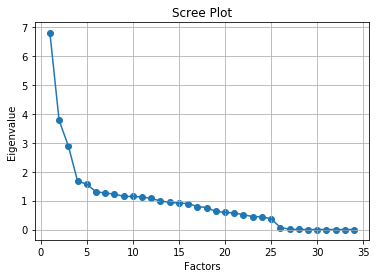

In [31]:
# Create scree plot using matplotlib
plt.scatter(range(1,X_train.shape[1]+1),ev)
plt.plot(range(1,X_train.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [32]:
fa = FactorAnalyzer(n_factors=10, rotation='varimax')
fa.fit(X_train)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=10, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [33]:
raz_x_fa = fa.transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(raz_x_fa, y, random_state=42,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)

In [35]:
# Импорт нужного из keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras
import tensorflow as tf

Using TensorFlow backend.


In [36]:
y_train_bin = np_utils.to_categorical(y_train)

y_test_bin = np_utils.to_categorical(y_test)

In [37]:
# Creating a model
model = Sequential()
model.add(Dense(5, input_dim=10, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='softmax'))


# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])


# Training a model
model.fit(X_train, y_train_bin, epochs=50, batch_size=10)

Epoch 1/50
4834/4834 [==============================] - 1s 261us/step - loss: 0.6583 - auc: 0.6028
Epoch 2/50
4834/4834 [==============================] - 1s 177us/step - loss: 0.5061 - auc: 0.7325
Epoch 3/50
4834/4834 [==============================] - 1s 177us/step - loss: 0.4037 - auc: 0.8038
Epoch 4/50
4834/4834 [==============================] - 1s 177us/step - loss: 0.3560 - auc: 0.8436
Epoch 5/50
4834/4834 [==============================] - 1s 177us/step - loss: 0.3389 - auc: 0.8662
Epoch 6/50
4834/4834 [==============================] - 1s 177us/step - loss: 0.3301 - auc: 0.8801
Epoch 7/50
4834/4834 [==============================] - 1s 180us/step - loss: 0.3246 - auc: 0.8898
Epoch 8/50
4834/4834 [==============================] - 1s 177us/step - loss: 0.3195 - auc: 0.8974
Epoch 9/50
4834/4834 [==============================] - 1s 178us/step - loss: 0.3159 - auc: 0.9031
Epoch 10/50
4834/4834 [==============================] - 1s 183us/step - loss: 0.3129 - auc: 0.9069
Epoch 11/

In [38]:
# evaluate the model
scores = model.evaluate(X_test, y_test_bin)
print("\nauc: %.2f%%" % (scores[1]*100))

1209/1209 [==============================] - 0s 75us/step

auc: 94.14%


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, RepeatedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

In [40]:
confusion_matrix(model.predict_classes(X_test), y_test)

array([[799,  95],
       [ 34, 281]], dtype=int64)

Thus in binary classification, the count of true negatives is C00, 
false negatives is C10, true positives is C11 and false positives is C01.

In [41]:
p = X.MonthlyCharges.mean()
p

62.85776104583815

In [42]:
y_cross = np_utils.to_categorical(y)

In [43]:
confusion_matrix(model.predict_classes(raz_x_fa), y)

array([[3990,  494],
       [ 184, 1375]], dtype=int64)

In [44]:
# evaluate the model
scores = model.evaluate(raz_x_fa, y_cross)
print("\nauc: %.2f%%" % (scores[1]*100))

6043/6043 [==============================] - 0s 40us/step

auc: 94.16%


In [45]:
## TP = 1375, FP = 494, TN = 3990, FN = 184

In [46]:
## b 1352 + 152 ) * p
## c (1352 * 0.9 + 517) * p
## d 1352 + 517 ) * 0.3 * p
## e 152 * p + 1352 * (1 - 0.9) * p
## f 3 - 4
## g f / 6043

In [58]:
print(round((184 + 1375 * 1 - 0.8 ) * p, 2))

97944.96


In [47]:
Threshold = pd.DataFrame(model.predict(raz_x_fa), columns = ['zero','pred']) # слева ноль, справа единица

In [48]:
def get_x(x, i):
    if x > i:
        return 1
    else:
        return 0

In [49]:
print('A:')
for i in np.arange(0.1, 1, 0.1):
    i = round(i,1)
    Threshold['tr'+str(round(i,1))] = Threshold['pred'].apply(lambda x: get_x(x, i))
    print(i, accuracy_score(Threshold['tr'+str(i)], y))
    print(confusion_matrix(Threshold['tr'+str(i)], y))
    cm = confusion_matrix(Threshold['tr'+str(i)], y)
    print('b',(cm[1,1]+cm[1,0])*p)
    b = (cm[1,1]+cm[1,0])*p
    print('c',(cm[1,1]*0.9+cm[0,1])*p)
    c = (cm[1,1]*0.9+cm[0,1])*p
    print('d',(cm[1,1]+cm[0,1])*0.3*p)
    d = (cm[1,1]+cm[0,1])*0.3*p
    print('e',cm[1,0]*p+cm[1,1]*(1-0.9)*p)
    e = cm[1,0]*p+cm[1,1]*(1-0.9)*p
    print('f',c-d-e)
    f = c - d - e
    print('g',f / 6043, '\n')

A:
0.1 0.7301009432401125
[[2669  126]
 [1505 1743]]
b 204162.00787688233
c 106525.04764438192
d 35244.34661840145
e 105557.03812427602
f -34276.33709829555
g -5.672072993264199 

0.2 0.8361740857190137
[[3450  266]
 [ 724 1603]]
b 146270.00995366537
c 107405.05629902365
d 35244.34661840145
e 55585.11809283467
f 16575.591587787538
g 2.7429408551692105 

0.3 0.8662915770312759
[[3728  362]
 [ 446 1507]]
b 122761.2073225219
c 108008.4908050637
d 35244.34661840145
e 37507.22601605162
f 35256.918170610625
g 5.834340256596165 

0.4 0.877875227535992
[[3882  446]
 [ 292 1423]]
b 107801.06019361243
c 108536.49599784875
d 35244.34661840145
e 27299.12562220751
f 45993.0237572398
g 7.610958755128214 

0.5 0.8878040708257487
[[3990  494]
 [ 184 1375]]
b 97995.24947046168
c 108838.21325086876
d 35244.34661840145
e 20208.77017623696
f 53385.09645623035
g 8.834204278707654 

0.6 0.8916101274201556
[[4072  553]
 [ 102 1316]]
b 89132.3051629985
c 109209.07404103922
d 35244.34661840145
e 14683.57298030

Thus in binary classification, the count of true negatives is C00, false negatives is C10, true positives is C11 and false positives is C01.

In [50]:
f / 6043 / f

0.00016548072149594575

In [51]:
print('B:')
for i in np.arange(0.1, 1, 0.1):
    i = round(i,1)
    Threshold['tr'+str(round(i,1))] = Threshold['pred'].apply(lambda x: get_x(x, i))
    print(i, accuracy_score(Threshold['tr'+str(i)], y))
    print(confusion_matrix(Threshold['tr'+str(i)], y))
    cm = confusion_matrix(Threshold['tr'+str(i)], y)
    print('b',(cm[1,1]+cm[1,0])*p)
    b = (cm[1,1]+cm[1,0])*p
    print('c',(cm[1,1]*0.75+cm[0,1])*p)
    c = (cm[1,1]*0.75+cm[0,1])*p
    print('d',(cm[1,1]+cm[0,1])*0.2*p)
    d = (cm[1,1]+cm[0,1])*0.2*p
    print('e',cm[1,0]*p+cm[1,1]*(1-0.75)*p)
    e = cm[1,0]*p+cm[1,1]*(1-0.75)*p
    print('f',c-d-e)
    f = c - d - e
    print('g',f / 6043, '\n')

B:
0.1 0.7301009432401125
[[2669  126]
 [1505 1743]]
b 204162.00787688233
c 90090.88601894754
d 23496.231078934303
e 121991.1997497104
f -55396.54480969717
g -9.167060203491175 

0.2 0.8361740857190137
[[3450  266]
 [ 724 1603]]
b 146270.00995366537
c 92290.90765555187
d 23496.231078934303
e 70699.26673630647
f -1904.5901596889016
g -0.3151729537793979 

0.3 0.8662915770312759
[[3728  362]
 [ 446 1507]]
b 122761.2073225219
c 93799.49392065198
d 23496.231078934303
e 51716.22290046334
f 18587.039941254334
g 3.0757967799527277 

0.4 0.877875227535992
[[3882  446]
 [ 292 1423]]
b 107801.06019361243
c 95119.50690261458
d 23496.231078934303
e 40716.11471744167
f 30907.161106238607
g 5.114539319251796 

0.5 0.8878040708257487
[[3990  494]
 [ 184 1375]]
b 97995.24947046168
c 95873.80003516465
d 23496.231078934303
e 33173.183391941086
f 39204.38556428926
g 6.487570008983826 

0.6 0.8916101274201556
[[4072  553]
 [ 102 1316]]
b 89132.3051629985
c 96800.95201059076
d 23496.231078934303
e 27091.69

In [59]:
f / 6043 / f

0.00016548072149594572